In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#from sklearn.metrics import classification_repo
#rt, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
df = pd.read_csv('google_reviews5.csv')
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_urls,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,https://lh5.googleusercontent.com/p/AF1QipMWTU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.373780e+18
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipMcUy...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.373780e+18
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,https://lh5.googleusercontent.com/p/AF1QipMrQg...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.373780e+18
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOCqJ...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.373780e+18
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipP7KU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.373780e+18


In [43]:
print (df['rating'].unique())

[4.4 4.1 4.2 3.9 4.5 4.6 4.3 4.7 4.8]


In [44]:
#EDA
df.isnull().sum()

query                                    0
name                                     0
google_id                                0
place_id                                 0
location_link                            0
reviews_link                             0
reviews_per_score                        0
reviews                                  0
rating                                   0
review_id                                0
author_link                              0
author_title                             0
author_id                                0
author_image                             0
review_text                              0
review_img_url                         257
review_img_urls                        257
owner_answer                           828
owner_answer_timestamp                 829
owner_answer_timestamp_datetime_utc    829
review_link                              1
review_rating                            1
review_timestamp                         1
review_date

In [3]:
df['review_text']. dropna() #need to deal with missing data-delete rows?, justify. empty reviews dropped, not useful to dataset

0      This place is absolutely outstanding. It was a...
1      Excellent dinner experience in the city center...
2      Outstanding from start to finish!\n\nEnjoyed a...
3      Called in on a Saturday without a booking with...
4      We went today for lunch, food was amazing! The...
                             ...                        
995    First time visiting and it was an excellent ex...
996    Mr. Fox have been the best choice that I made ...
997    Words cannot describe the impeccable experienc...
998    That was a first restaurant we went after a lo...
999          Lovely place!  Very private and great food!
Name: review_text, Length: 1000, dtype: object

In [4]:
df=df.dropna(subset=['review_text'])

In [47]:
df.isnull().sum()

query                                    0
name                                     0
google_id                                0
place_id                                 0
location_link                            0
reviews_link                             0
reviews_per_score                        0
reviews                                  0
rating                                   0
review_id                                0
author_link                              0
author_title                             0
author_id                                0
author_image                             0
review_text                              0
review_img_url                         257
review_img_urls                        257
owner_answer                           828
owner_answer_timestamp                 829
owner_answer_timestamp_datetime_utc    829
review_link                              1
review_rating                            1
review_timestamp                         1
review_date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                1000 non-null   object 
 1   name                                 1000 non-null   object 
 2   google_id                            1000 non-null   object 
 3   place_id                             1000 non-null   object 
 4   location_link                        1000 non-null   object 
 5   reviews_link                         1000 non-null   object 
 6   reviews_per_score                    1000 non-null   object 
 7   reviews                              1000 non-null   int64  
 8   rating                               1000 non-null   float64
 9   review_id                            1000 non-null   object 
 10  author_link                          1000 non-null   object 
 11  author_title                   

In [49]:
df.describe()

,reviews,rating,author_id,owner_answer_timestamp,review_rating,review_timestamp,review_likes,reviews_id
count,1000.000000,1000.000000,1.000000e+03,1.710000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02
mean,2680.000000,4.370000,1.094714e+20,1.674750e+09,4.361361,1.668195e+09,0.766767,2.886360e+17
std,2507.339277,0.243227,5.398746e+18,1.352623e+07,1.078366,3.211613e+07,1.522923,5.136254e+18
min,845.000000,3.900000,1.000010e+20,1.626207e+09,1.000000,1.486412e+09,0.000000,-9.131130e+18
25%,1575.250000,4.175000,1.047080e+20,1.670256e+09,4.000000,1.666274e+09,0.000000,-4.257645e+18
50%,2088.000000,4.400000,1.096475e+20,1.679905e+09,5.000000,1.678917e+09,0.000000,7.085230e+17
75%,2998.500000,4.525000,1.142652e+20,1.683452e+09,5.000000,1.684693e+09,1.000000,4.049010e+18
max,12985.000000,4.800000,1.184240e+20,1.688986e+09,5.000000,1.689081e+09,17.000000,8.981480e+18


In [50]:
df.shape

(1000, 26)

In [6]:
df['rating'].value_counts()

4.4    200
4.1    200
4.7    150
4.2    100
4.5    100
4.3    100
3.9     50
4.6     50
4.8     50
Name: rating, dtype: int64

ValueError: 'explode' must be of length 'x'

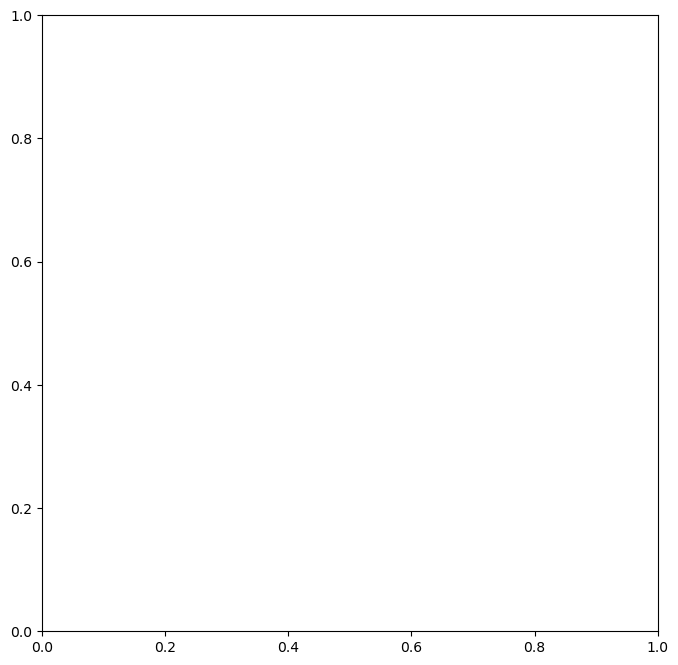

In [52]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [7]:
import string

def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower()])

In [8]:
df.review_text.astype(str)

0      This place is absolutely outstanding. It was a...
1      Excellent dinner experience in the city center...
2      Outstanding from start to finish!\n\nEnjoyed a...
3      Called in on a Saturday without a booking with...
4      We went today for lunch, food was amazing! The...
                             ...                        
995    First time visiting and it was an excellent ex...
996    Mr. Fox have been the best choice that I made ...
997    Words cannot describe the impeccable experienc...
998    That was a first restaurant we went after a lo...
999          Lovely place!  Very private and great food!
Name: review_text, Length: 1000, dtype: object

In [ ]:
#pip install WordCloud

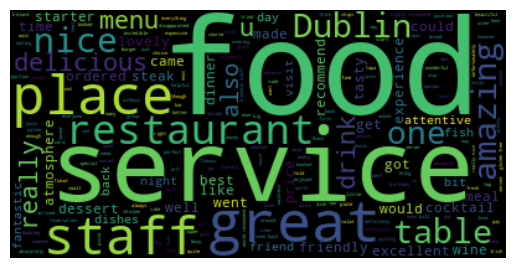

In [9]:
#Creating Stopwords list
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))
stopwords.update(["br","href", "good",'Translated' 'by' 'Google','of','the','is'])
textt = " ".join(review for review in df.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
df['review_text'].head().apply(clean_text)

0    This place is absolutely outstanding It was a ...
1    Excellent dinner experience in the city center...
2    Outstanding from start to finish Enjoyed a won...
3    Called in on a Saturday without a booking with...
4    We went today for lunch food was amazing The p...
Name: review_text, dtype: object

In [11]:
df.loc[0, 'review_text'][-50:]

"dn't suit a standard date night (for most people)."

In [15]:
#counting nr. of stopwords per review
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['nr_stopwords'] = df['review_text'].apply(lambda x: len(set(x.split()) & stop_words))

In [17]:
df['nr_stopwords'].describe()#assessing nr. of stopwords in dataset

count    1000.000000
mean       15.025000
std         8.637533
min         0.000000
25%         9.000000
50%        13.000000
75%        20.000000
max        54.000000
Name: nr_stopwords, dtype: float64

In [27]:
import string 
# Storing the sets of punctuation in variable result 
result = string.punctuation 
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [57]:
from collections import Counter
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

df['count_punct'] = df.review_text.apply(lambda s: count(s, string.punctuation))
accumulate = lambda l1,l2: [x for x in l1 if x in l2]

df['acc_punct_list'] = df.review_text.apply(lambda s: accumulate(s, string.punctuation))
# accumulate the punctuation marks of each line in a dict and transpose each element into dataframe columns
df['acc_punct_dict'] = df.review_text.apply(lambda s: {k: v for k, v in Counter(s).items() if k in string.punctuation} if any(char in string.punctuation for char in s) else {})

In [60]:
df_punct = df.acc_punct_dict.apply(pd.Series)

In [64]:
df_punct

,.,",",',(,),!,:,-,+,;,/,&,"""",%,*,#,?,~,@,\
0,6.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,NaN,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,7.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,4.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,count_punct,acc_punct_list,acc_punct_dict
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.373780e+18,13,"[., ., ,, ., ,, ., ,, ., ,, ', (, ), .]","{'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}"
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.373780e+18,4,"[., ., ., .]",{'.': 4}
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.373780e+18,14,"[!, ., ., ., ., (, ), !, !, !, ., ., !, !]","{'!': 6, '.': 6, '(': 1, ')': 1}"
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.373780e+18,5,"[., ., ., ., .]",{'.': 5}
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.373780e+18,8,"[,, !, ., (, ), ,, ,, ,]","{',': 4, '!': 1, '.': 1, '(': 1, ')': 1}"


In [74]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk.tag import pos_tag_sents#importing tagger for POS speech tagging
brown.words()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [73]:
df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review_text']), axis=1)
df['review_length'] = df.apply(lambda row: len(row['tokenized_review']), axis=1)
df.head()
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#count nr. of adjectives and nouns in review 

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,count_punct,acc_punct_list,acc_punct_dict,tokenized_review,review_length
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.373780e+18,13,"[., ., ,, ., ,, ., ,, ., ,, ', (, ), .]","{'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}","[This, place, is, absolutely, outstanding, ., ...",116
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.373780e+18,4,"[., ., ., .]",{'.': 4},"[Excellent, dinner, experience, in, the, city,...",52
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.373780e+18,14,"[!, ., ., ., ., (, ), !, !, !, ., ., !, !]","{'!': 6, '.': 6, '(': 1, ')': 1}","[Outstanding, from, start, to, finish, !, Enjo...",134
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.373780e+18,5,"[., ., ., ., .]",{'.': 5},"[Called, in, on, a, Saturday, without, a, book...",79
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.373780e+18,8,"[,, !, ., (, ), ,, ,, ,]","{',': 4, '!': 1, '.': 1, '(': 1, ')': 1}","[We, went, today, for, lunch, ,, food, was, am...",61


In [76]:
#pip install spacy

     ---------------------------------------- 12.3/12.3 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 15.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 15.0 MB/s eta 0:00:00
     ------------------------------------- 481.6/481.6 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.6 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install spacy -q


Note: you may need to restart the kernel to use updated packages.


In [98]:
!python -m spacy download en_core_web_sm -q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [101]:
import spacy
from spacy import displacy
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
import en_core_web_sm

In [109]:
df['review_text'].astype(str)
doc = df['review_text'].apply(nlp)#applying spacy and background pipeline will return the objects.

AttributeError: 'Series' object has no attribute 'ents'

In [111]:
# Function to process each text and extract named entities
def get_named_entities(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply the function to 'review_text' column and store the results in a new column 'named_entities'
df['named_entities'] = df['review_text'].apply(get_named_entities)
#reate a function get_named_entities that processes each text using spaCy and returns a
#list of named entities and their labels. Then, we use the apply method to apply this function 
#to each element in the 'review_text' column and store the results in a new column called 'named_entities'.
#Now, you can access the named entities for each text in the DataFrame.



AttributeError: 'Series' object has no attribute 'ents'

In [112]:
print(df['named_entities'].head())

0                                                   []
1                   [(Dublin, GPE), (three, CARDINAL)]
2    [(Fire.\n\n, FAC), (3, CARDINAL), (Two, CARDIN...
3                                   [(Saturday, DATE)]
4       [(today, DATE), (Alex, PERSON), (Greece, GPE)]
Name: named_entities, dtype: object


In [113]:
displacy.render(nlp(str(df['named_entities'])), jupyter=True, style='ent')
#generate the raw markup.

In [115]:
displacy.render(nlp(str(df['named_entities'])), style='dep', jupyter = True, options = {'distance': 120})
#Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like

In [116]:
# extract part-of-speech and lemmatize
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(df['named_entities'])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('0', 'NUM', '0'),
 ('                                                    ',
  'SPACE',
  '                                                    '),
 ('[', 'X', '['),
 (']', 'X', ']'),
 ('\n', 'SPACE', '\n'),
 ('1', 'NUM', '1'),
 ('                    ', 'SPACE', '                    '),
 ('[', 'X', '['),
 ('Dublin', 'PROPN', 'Dublin'),
 ('GPE', 'PROPN', 'GPE'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('\n', 'SPACE', '\n'),
 ('2', 'NUM', '2'),
 ('     ', 'SPACE', '     '),
 ('Fire.\\n\\n', 'PROPN', 'Fire.\\n\\n'),
 ('FAC', 'PROPN', 'FAC'),
 ('3', 'NUM', '3'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('CARDIN', 'PROPN', 'CARDIN'),
 ('\n', 'SPACE', '\n'),
 ('3', 'NUM', '3'),
 ('                                    ',
  'SPACE',
  '                                    '),
 ('[', 'X', '['),
 ('Saturday', 'PROPN', 'Saturday'),
 ('DATE', 'PROPN', 'DATE'),
 ('\n', 'SPACE', '\n'),
 ('4', 'NUM', '4'),
 ('        ', 'SPACE', '        '),
 ('today', 'NOUN', 'today'),
 ('DATE', 'NOUN', 'date'),
 ('Alex', 'P

In [117]:
dict([(str(x), x.label_) for x in nlp(str(df['named_entities'])).ents])
#using a list comprehension to extract token information (orthographic 
#representation, part-of-speech tag, and lemma) from a spaCy Doc object
#output is a list of tuples, each containing the orthographic representation,
#part-of-speech tag, and lemma of the tokens

{'1                     ': 'CARDINAL',
 'Dublin': 'GPE',
 'GPE': 'ORG',
 'three': 'CARDINAL',
 'CARDINAL': 'ORG',
 '2      ': 'PRODUCT',
 'Fire.\\n\\n, FAC': 'ORG',
 '3': 'CARDINAL',
 'Two': 'CARDINAL',
 'Saturday': 'DATE',
 '4         ': 'CARDINAL',
 'today': 'DATE',
 'Greece': 'GPE',
 '995             ': 'CARDINAL',
 'First': 'ORDINAL',
 'ORDINAL': 'ORG',
 '2 hours': 'TIME',
 'TIME': 'ORG',
 '996': 'CARDINAL',
 'Fox': 'ORG',
 '997': 'CARDINAL',
 'Truly Michelin': 'PERSON',
 '998': 'CARDINAL',
 'first': 'ORDINAL',
 'Ireland': 'GPE',
 '11': 'CARDINAL',
 '999                                                   ': 'CARDINAL',
 'Length': 'PERSON',
 '1000': 'CARDINAL'}

In [120]:
for entities in df['named_entities']:
    print(entities)

[]
[('Dublin', 'GPE'), ('three', 'CARDINAL')]
[('Fire.\n\n', 'FAC'), ('3', 'CARDINAL'), ('Two', 'CARDINAL'), ('Dawson St', 'PERSON'), ('evening', 'TIME')]
[('Saturday', 'DATE')]
[('today', 'DATE'), ('Alex', 'PERSON'), ('Greece', 'GPE')]
[('the end of the night', 'DATE'), ('two', 'CARDINAL'), ('two', 'CARDINAL')]
[('Leonardo Bueno', 'PERSON'), ('dessert', 'PERSON'), ('the lemmon sorbet', 'PERSON'), ('irish', 'NORP'), ('about a day', 'DATE'), ('Dublin', 'GPE')]
[('this evening', 'TIME'), ('this evening', 'TIME'), ('17:30', 'TIME')]
[('Level', 'PERSON'), ('Dublin', 'GPE'), ('6', 'CARDINAL'), ('Saturday', 'DATE'), ('40€', 'QUANTITY'), ('3', 'CARDINAL'), ('the Rib Eye', 'ORG')]
[('Thursday', 'DATE'), ('the day before', 'DATE'), ('3', 'CARDINAL'), ('Connemara', 'GPE'), ('Irish', 'NORP'), ('Mango Caipirinha', 'PERSON'), ('Grafton', 'ORG'), ("St. Stephen's Green", 'GPE')]
[('dublin', 'GPE'), ('2', 'CARDINAL'), ('60 euro', 'QUANTITY'), ('3', 'CARDINAL'), ('🍞', 'ORG'), ('2', 'CARDINAL'), ('14', 

In [123]:
displacy.render(doc, jupyter=True, style='ent')
#Running this code will display a visual representation
#of the named entities detected in the 'article'. Each entity will be highlighted with its respective entity label. 

In [18]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [19]:
preprocessor(df.loc[0, 'review_text'][-50:])

'dn t suit a standard date night for most people '

In [20]:
df['review_text'] = df['review_text'].apply(preprocessor)

In [21]:
df['review_text'] = df['review_text'].astype(str)
#df['review_text'] = df['review_text'].str.lower()

In [22]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['review_text'] = df['review_text'].apply(lambda x: stem_words(x))

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["review_text"] = df["review_text"].apply(lambda text: lemmatize_words(text))

In [25]:
df['review_text'].head()

0    thi place is absolut outstand it wa a birthday...
1    excel dinner experi in the citi center of dubl...
2    outstand from start to finish enjoy a wonder e...
3    call in on a saturday without a book with my d...
4    we went today for lunch food wa amaz the place...
Name: review_text, dtype: object

In [ ]:
#df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

<Axes: xlabel='count', ylabel='review_text'>

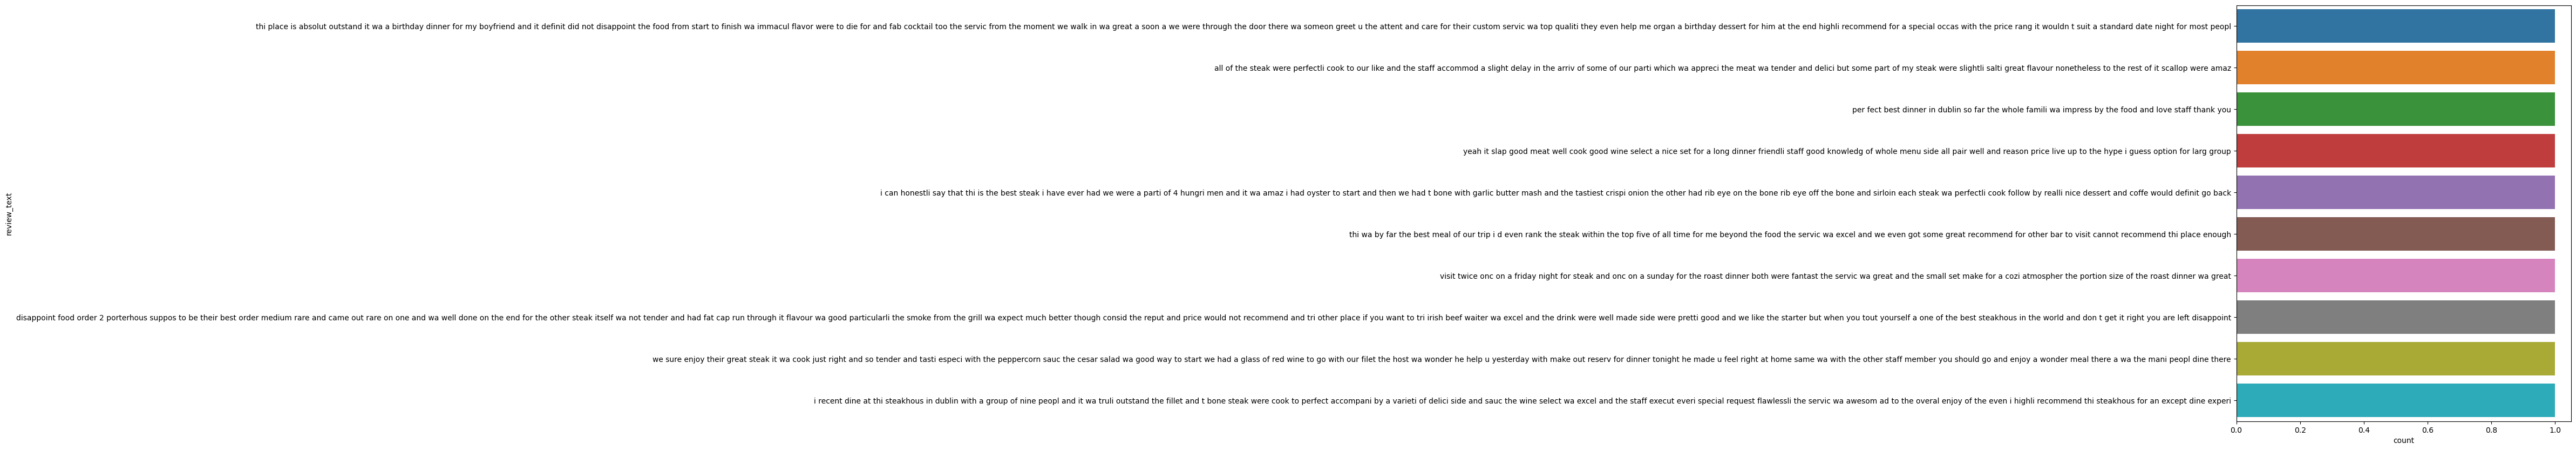

In [24]:
plt.figure(figsize=(8,10))
sns.countplot(y='review_text',data=df,order=df.review_text.value_counts().iloc[:10].index)

In [ ]:
#after removing punction, readding it in as indicator
df['review_text'].replace({'!': ' exclamation ','?': ' question ',
                           '\'' : ' quotation ','\'': 'quotation'},inplace=True)


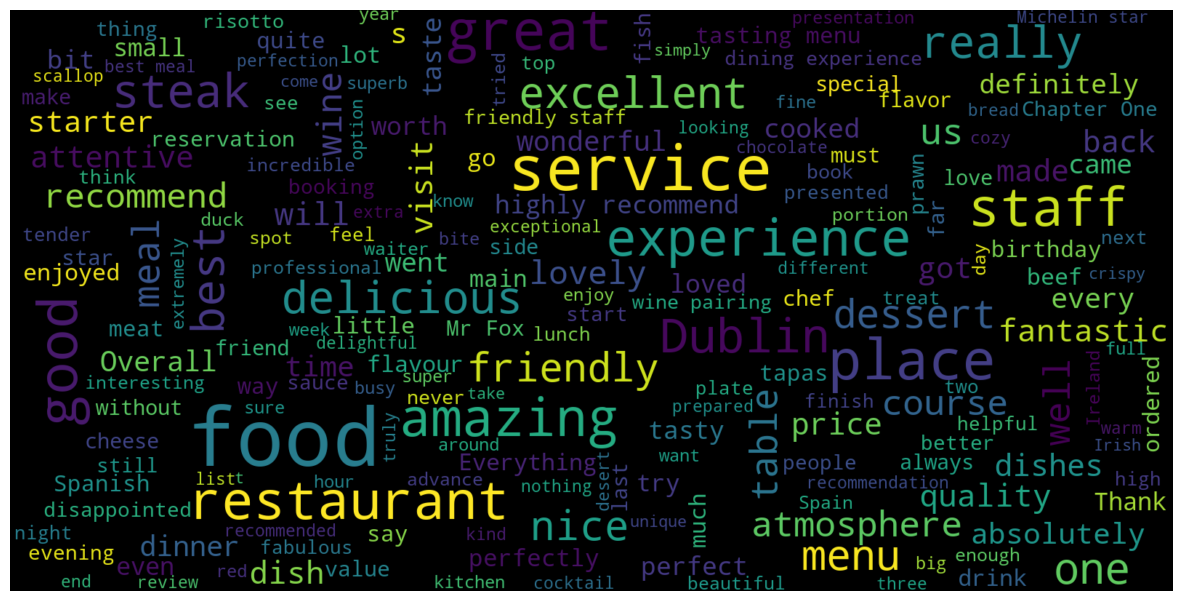

In [55]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']>4.5].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']<4].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('punkt')

In [ ]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

def clean(text):
    text=word_tokenize(text)
    text=[word.lower() for word in text if word.isalpha()]
    punct=str.maketrans('','', string.punctuation)
    text=[word.translate(punct) for word in text]
    #text =[word for word in text if not word in stopwords]
    return text
df['review_text']=df['review_text'].apply(clean)

In [ ]:
df['tokenized'] = df.apply(lambda x: clean(x['review_text']), axis=1)
df.head()

In [ ]:
from collections import Counter

def counter(text):
    cnt=Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt=counter(df['review_text'])

In [56]:
text_cnt.most_common(10)

[("'", 130790),
 (',', 64395),
 (' ', 64395),
 ('e', 30557),
 ('t', 24512),
 ('a', 23615),
 ('i', 20012),
 ('o', 19765),
 ('r', 17113),
 ('n', 14618)]

In [ ]:
common_words= text_cnt.most_common(30)
common_words=pd.DataFrame(common_words, columns=['Words','Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y='Words', x='Counts', data=common_words)

In [ ]:

from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk import sent_tokenize, word_tokenize as word_tokenize


In [57]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [64]:
reviewText = df['review_text'].astype(str)

In [59]:
reviewText = reviewText.apply(word_tokenize)
reviewText.head()

0    [This, place, is, absolutely, outstanding, ., ...
1    [Excellent, dinner, experience, in, the, city,...
2    [Outstanding, from, start, to, finish, !, Enjo...
3    [Called, in, on, a, Saturday, without, a, book...
4    [We, went, today, for, lunch, ,, food, was, am...
Name: review_text, dtype: object

In [60]:
fdist = FreqDist(reviewText[6])
fdist

FreqDist({'.': 8, 'the': 6, 'to': 6, 'and': 4, ',': 3, 'a': 3, 'will': 3, 'place': 2, 'who': 2, 'me': 2, ...})

In [61]:
reviewText.head()

0    [This, place, is, absolutely, outstanding, ., ...
1    [Excellent, dinner, experience, in, the, city,...
2    [Outstanding, from, start, to, finish, !, Enjo...
3    [Called, in, on, a, Saturday, without, a, book...
4    [We, went, today, for, lunch, ,, food, was, am...
Name: review_text, dtype: object

In [65]:
#positive speech tagging
reviewText = df['review_text'].astype(str)
nltk.download('averaged_perceptron_tagger')
text = reviewText[8]
word_tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(word_tokens)
for token in text:
    print(nltk.pos_tag([token]))
tig= nltk.pos_tag([token])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('L', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[('r'

In [66]:
#named entity recognition, system identifies which word is a person’s name, location, etc.
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
#importing chunk library from nltk
#text = reviewText[8]
#token = word_tokenize(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [67]:
pip install svgling

Note: you may need to restart the kernel to use updated packages.


In [68]:
#tags = nltk.pos_tag(token)
#chunking picking up individual pieces of info and grouping into bigger pieces ie grouping words/tokens into chunks
chunk = ne_chunk(tig)
chunk

In [69]:
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tig)
print(result)


(S ./.)


In [70]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [72]:
#pip install pandarallel
import nltk
nltk.download('vader_lexicon')
df['review_text'].astype(str)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0      This place is absolutely outstanding. It was a...
1      Excellent dinner experience in the city center...
2      Outstanding from start to finish!\n\nEnjoyed a...
3      Called in on a Saturday without a booking with...
4      We went today for lunch, food was amazing! The...
                             ...                        
995    First time visiting and it was an excellent ex...
996    Mr. Fox have been the best choice that I made ...
997    Words cannot describe the impeccable experienc...
998    That was a first restaurant we went after a lo...
999          Lovely place!  Very private and great food!
Name: review_text, Length: 1000, dtype: object

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review_text'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df['vadar sentiment'] = df['vadar compound'].apply(categorise_sentiment)


In [75]:
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,vadar compound,vadar sentiment
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.373780e+18,0.9745,positive
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.373780e+18,0.7964,positive
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.373780e+18,0.9897,positive
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.373780e+18,0.9674,positive
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.373780e+18,0.9702,positive


In [77]:
#generate summary statistics
df[['vadar compound']].describe()

,vadar compound
count,1000.000000
mean,0.781704
std,0.393886
min,-0.972300
25%,0.817275
50%,0.927700
75%,0.967825
max,0.999300


<Axes: title={'center': 'Sentiment Score'}, xlabel='Period', ylabel='Mean Sentiment Score'>

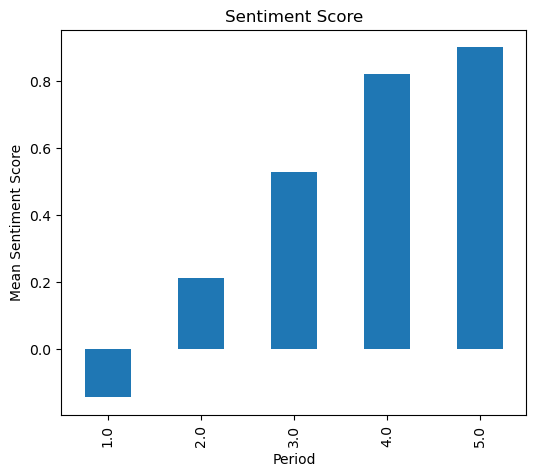

In [78]:
#generate mean of sentiment_score by period
dfg = df.groupby(['review_rating'])['vadar compound'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(6, 5))

In [79]:
df['vadar sentiment'].value_counts()

positive    930
negative     62
neutral       8
Name: vadar sentiment, dtype: int64

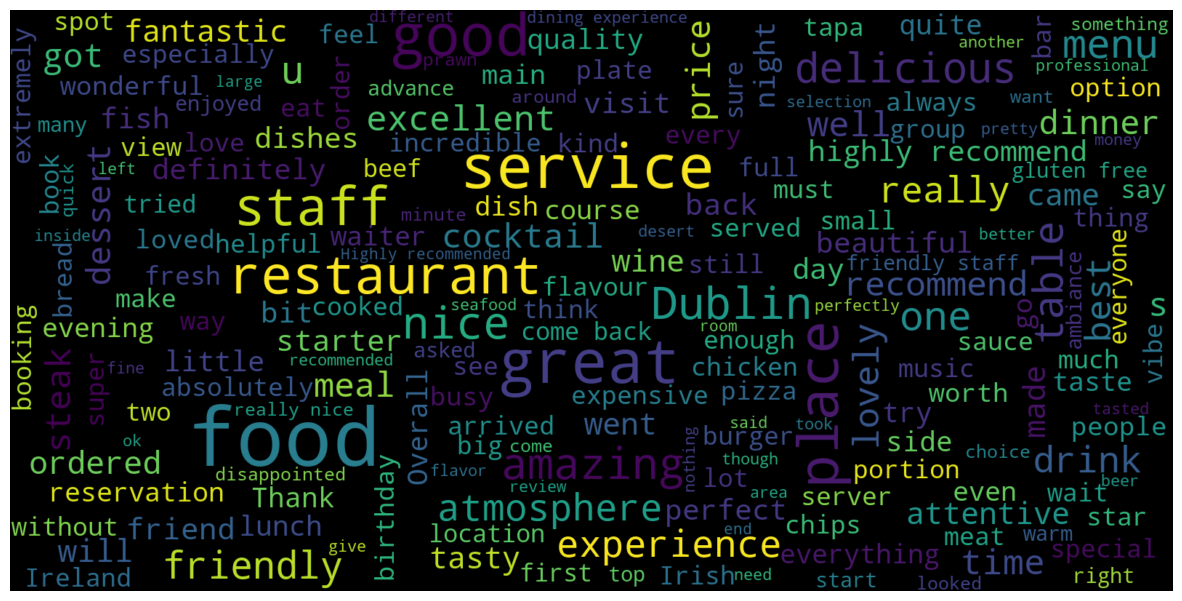

In [80]:
positive_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positive_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

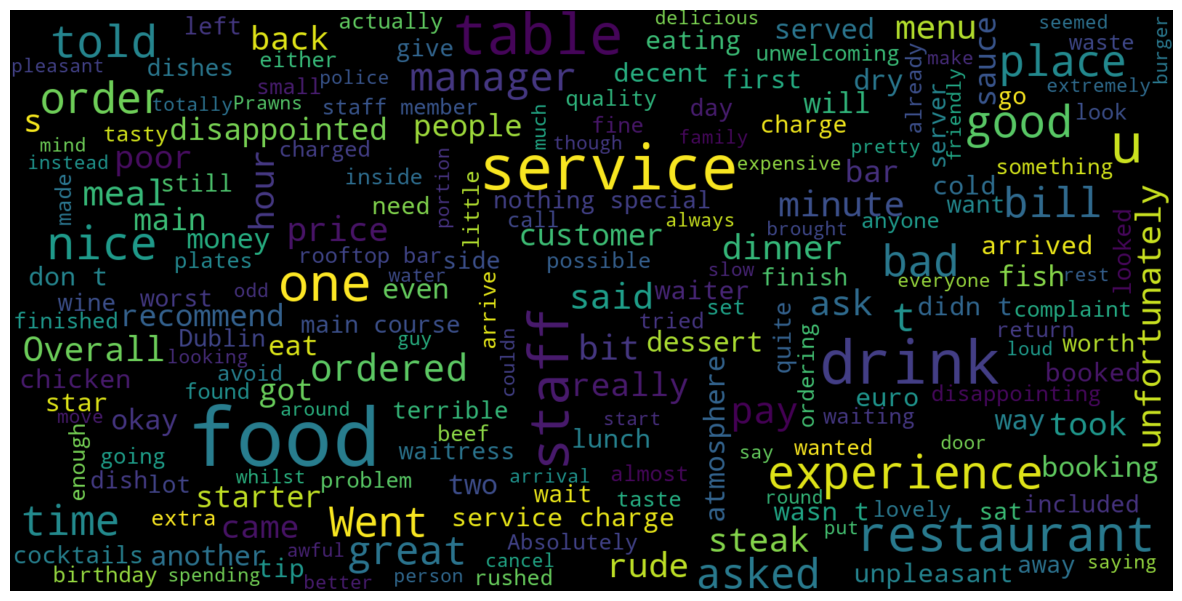

In [81]:
negative_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(negative_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
#Converting text into Vectors
#TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally
#to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['review_text'] ).toarray()

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [91]:
dfNew = df[['review_text','vadar sentiment']]
dfNew.head()

,review_text,vadar sentiment
0,This place is absolutely outstanding. It was a...,positive
1,Excellent dinner experience in the city center...,positive
2,Outstanding from start to finish!\n\nEnjoyed a...,positive
3,Called in on a Saturday without a booking with...,positive
4,"We went today for lunch, food was amazing! The...",positive


In [92]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [93]:
#Predicting sentiment

#analysis and vectorization is done. We can now explore any machine learning model to train the data. But before that 
#perform the train-test split.
from sklearn.model_selection import train_test_split

# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review_text'])
test_matrix = vectorizer.transform(test['review_text'])

In [94]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression(solver='lbfgs', max_iter=6000)

In [95]:

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [96]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [98]:
predictions = lr.predict(X_test)
print(predictions)

['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'posit

In [100]:
# see the confusion matrix for the results.
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  0,   0,   0],
       [  0,   0,   0],
       [ 13,   2, 190]], dtype=int64)

In [101]:
print(classification_report(predictions,y_test))
#no feature extraction or much preprocessing.

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.93      0.96       205

    accuracy                           0.93       205
   macro avg       0.33      0.31      0.32       205
weighted avg       1.00      0.93      0.96       205



In [ ]:
#df_processed['clean_month']= np.where(df_processed['month1']>=1,df_processed['month1'],df_processed['month2'])
#df_processed.drop(columns=['month1',"month2"], inplace=True)

In [150]:
df['review_count']=df['author_title'].value_counts()#reviewers submitting >1 review
x=review_count.value_counts()
x

1    904
2     40
3      4
4      1
Name: author_title, dtype: int64

In [104]:
df['author_id'].value_counts()

1.173140e+20    4
1.008330e+20    4
1.006150e+20    3
1.055890e+20    3
1.166680e+20    3
               ..
1.164410e+20    1
1.067010e+20    1
1.115980e+20    1
1.029050e+20    1
1.024060e+20    1
Name: author_id, Length: 917, dtype: int64

In [108]:

df['name'].value_counts()

FIRE Steakhouse & Bar                           50
NoLIta                                          50
Gallaghers Boxty House                          50
Luigi Malones Dublin                            50
The Millstone Restaurant                        50
The Vintage Kitchen                             50
Chapter One Restaurant                          50
FX Buckley Steakhouse Crow Street               50
The Winding Stair                               50
Sophie’s                                        50
Flanagan's Bar & Restaurant                     50
Las Tapas De Lola                               50
Old Mill Restaurant                             50
SOLE Seafood & Grill                            50
The Church Café, Late Bar & Restaurant          50
Brasserie Sixty6 Restaurant                     50
The Market Bar Restaurant                       50
Fade Street Social Restaurant & Cocktail Bar    50
The Ivy Dublin                                  50
Mr Fox                         

In [152]:
#rule 1 where reviewer has >1 review for same place
df['rule1'] = np.nan#adding additional column
rule1_df = df[["name", 'author_title', "author_id",'place_id','review_count','rule1']]
#agg_rule1_df.head()
#rule1_df .groupby(["author_title"]).count().sort_values(["name"], 
                                            #ascending=False).rename(columns={"accident" : "Sum of accidents"}).reset_index()

rule1_df.head()

,name,author_title,author_id,place_id,review_count,rule1
0,FIRE Steakhouse & Bar,Leahh Thompson,1.010810e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN,NaN
1,FIRE Steakhouse & Bar,Rui Saraiva,1.105680e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN,NaN
2,FIRE Steakhouse & Bar,Bastable-Warren Irish-Dancers,1.149300e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN,NaN
3,FIRE Steakhouse & Bar,Laura Vaughan,1.072940e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN,NaN
4,FIRE Steakhouse & Bar,Adriana Tonito,1.067170e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN,NaN


In [172]:


# Get unique place names from the dataframe
unique_names = df['name'].unique()

# Create an empty list to store the results
results = []

# Iterate over unique place names
for name in unique_names:
    # Filter the dataframe for the current place name
    subset = df[df['name'] == name]
    
    # Get the unique author IDs for the current place name
    unique_author_ids = subset['author_id'].unique()
    
    # Check if the reviews are done by the corresponding author ID
    reviews_by_author_id = subset['author_id'].equals(subset['name'])
    
    # Append the result to the list
    results.append({'name': name, 'reviews_by_author_id': reviews_by_author_id})

# Create a new dataframe from the results list
results_df = pd.DataFrame(results)

# Display the resulting dataframe
print(results_df)


                                            name  reviews_by_author_id
0                          FIRE Steakhouse & Bar                 False
1                                         NoLIta                 False
2                                 The Ivy Dublin                 False
3   Fade Street Social Restaurant & Cocktail Bar                 False
4                      The Market Bar Restaurant                 False
5                    Brasserie Sixty6 Restaurant                 False
6         The Church Café, Late Bar & Restaurant                 False
7                           SOLE Seafood & Grill                 False
8                            Old Mill Restaurant                 False
9                              Las Tapas De Lola                 False
10                   Flanagan's Bar & Restaurant                 False
11                                      Sophie’s                 False
12                             The Winding Stair                 False
13    

In [183]:
# Calculate the count of reviews per author_id
reviews_per_author = df.groupby('author_title')['review_text'].count().reset_index()
reviews_per_author = reviews_per_author.rename(columns={'review_text': 'count of reviews'})

# Calculate the count of unique names of places reviewed per author_id
places_per_author = df.groupby('author_title')['name'].nunique().reset_index()
places_per_author = places_per_author.rename(columns={'name': 'count of names of places reviewed'})

# Merge the two dataframes on 'author_id'
new_dataset = pd.merge(reviews_per_author, places_per_author, on='author_title')
#The for loop iterates over the rows of the new_dataset dataframe using the iterrows() method. Inside the loop, we
#compare the 'count of names of places reviewed' with the 'count of reviews' for each row. 
#If the condition row['count of names of places reviewed'] < row['count of reviews'], there maybe be multiple reviews for
#same place
 #Add 'check 1' column using if-else statements
new_dataset['check 1'] = 0
for index, row in new_dataset.iterrows():
    if row['count of names of places reviewed'] < row['count of reviews']:
        new_dataset.at[index, 'check 1'] = 1

# Add 'check 2' column using if-else statements, check if this person submits>1 review
new_dataset['check 2'] = 0
for index, row in new_dataset.iterrows():
    if row['count of reviews'] > 1:
        new_dataset.at[index, 'check 2'] = 1

        
# Display the resulting dataset
print(new_dataset)

SyntaxError: ':' expected after dictionary key (3167672181.py, line 3)

In [179]:
print(new_dataset['check 1'].unique())

[0]


In [ ]:
#df_processed['reg_year'],df_processed['reg_county1'],df_processed['reg_num'] = df_processed['car_reg'].str.split

In [126]:
def rule_based_classification(rule1_df):
    categories = []
    for i in range(len(rule1_df)):
        if rule1_df[i]['author_id'] > 2 and rule1_df[i]['name'] > 2:
            categories.append("Category 1")
        elif rule1_df[i][author_id] > 2 or rule1_df[i]['name'] > 2:
            categories.append("Category 2")
        else:
            categories.append("Unclassified")
    
    return categories
rule_based_classification(rule1_df)

KeyError: 0

In [125]:
rule1_df.head()

,name,author_title,author_id,place_id,rule1
0,FIRE Steakhouse & Bar,Leahh Thompson,1.010810e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN
1,FIRE Steakhouse & Bar,Rui Saraiva,1.105680e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN
2,FIRE Steakhouse & Bar,Bastable-Warren Irish-Dancers,1.149300e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN
3,FIRE Steakhouse & Bar,Laura Vaughan,1.072940e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN
4,FIRE Steakhouse & Bar,Adriana Tonito,1.067170e+20,ChIJl9gur5sOZ0gRdWFOYPXJi6c,NaN
